Consider the UCI Wine Quality Dataset, which contains physiochemical properties of wines along with their quality scores (ranging from 0 to 10). Your task is to analyze the statistical properties (mean, variance, skewness and entropy) of the given features and use them to find out

* Wine Quality
* Which statistical measure is the most important predictor of wine quality?
* Does high entropy indicate harder classification of wine quality?
* What happens if we drop features with high variance

In [1]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
plt.style.use('ggplot')

In [4]:
red_wine_quality = pd.read_csv('datasets/winequality-red.csv', sep=';')
white_wine_quality = pd.read_csv('datasets/winequality-white.csv', sep=';')
wine_quality = pd.concat([red_wine_quality, white_wine_quality], axis=0)

In [5]:
# wq_X = wine_quality.data.features
# wq_y = wine_quality.data.targets
wq_X = wine_quality.drop(columns=['quality'])
wq_y = wine_quality['quality']

In [6]:
wq_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [7]:
wq_X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [8]:
wq_y.isnull().sum()

np.int64(0)

In [9]:
wq_X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [10]:
wq_y.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Calculating the mean, variance, skewness and entropy of each feature of the wine quality dataset

In [13]:
stat_props = pd.DataFrame()
stat_props["Mean"] = wq_X.mean()
stat_props["Variance"] = wq_X.var()
stat_props["Skewness"] = wq_X.skew()

stat_props["Entropy"] = wq_X.apply(lambda x: entropy(x.value_counts()))

new_row = pd.DataFrame(
    {
        "Mean": wq_y.mean(),
        "Variance": wq_y.var(),
        "Skewness": wq_y.skew(),
        "Entropy": entropy(wq_y.value_counts())
    }
)

stat_props = pd.concat([stat_props, new_row])

stat_props

ValueError: If using all scalar values, you must pass an index

From the calculations, we are able to find that the feature <b>total_sulfur_dioxide</b> has the highest variance

Creating another dataset from the wine quality dataset by dropping the column with the highest variance

In [38]:
wq_X_1 = wq_X.drop(columns = ["total_sulfur_dioxide"])

In [7]:
wq_y["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Creating a third dataset with the <b>density</b> column removed. (This feature has the highest entropy among all the features)

In [48]:
wq_X_2 = wq_X.drop(columns = ["density"])

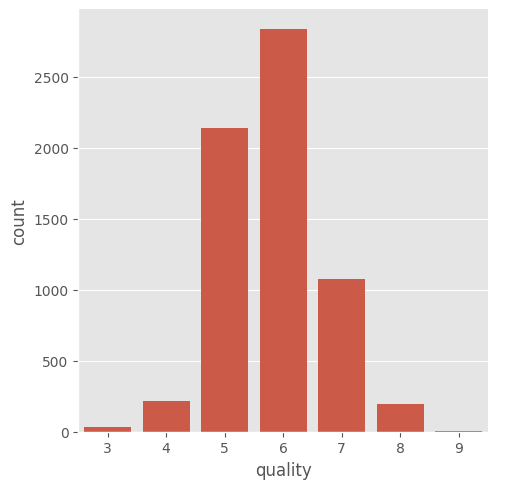

In [8]:
sns.catplot(x = "quality", data = wq_y, kind = "count")

In [9]:
combined = pd.concat([wq_X, wq_y], axis = 1)


Calculating the correlation matrix of the dataset and displaying a heatmap

<Axes: >

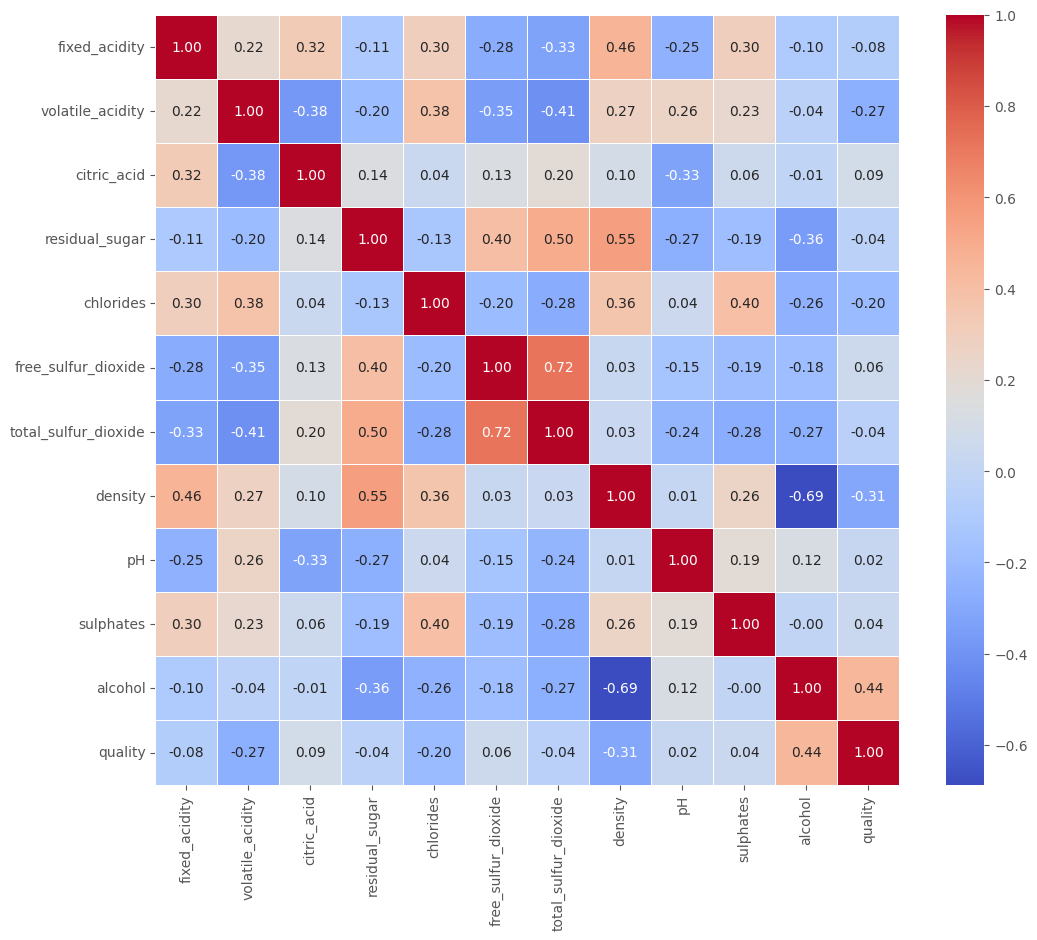

In [10]:
corr_matrix = combined.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)


Calculating the correlation matrix of the new dataset which does not have the <b>total_sulfur_dioxide</b> column and displaying it as a heatmap

<Axes: >

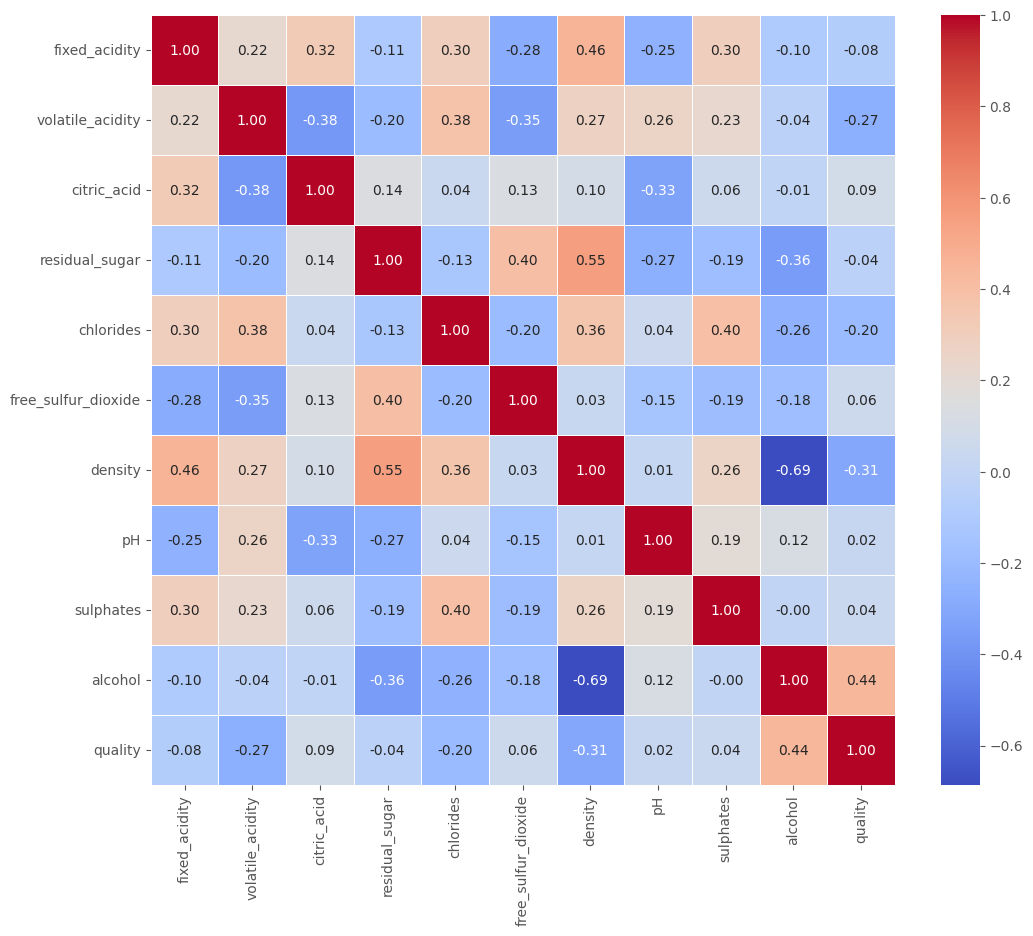

In [41]:
combined_1 = pd.concat([wq_X_1, wq_y], axis = 1)
corr_matrix_1 = combined_1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_1, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)

Calculating the correlation matrix of the third dataset which does not have the <b>density</b> column and displaying it as a heatmap

<Axes: >

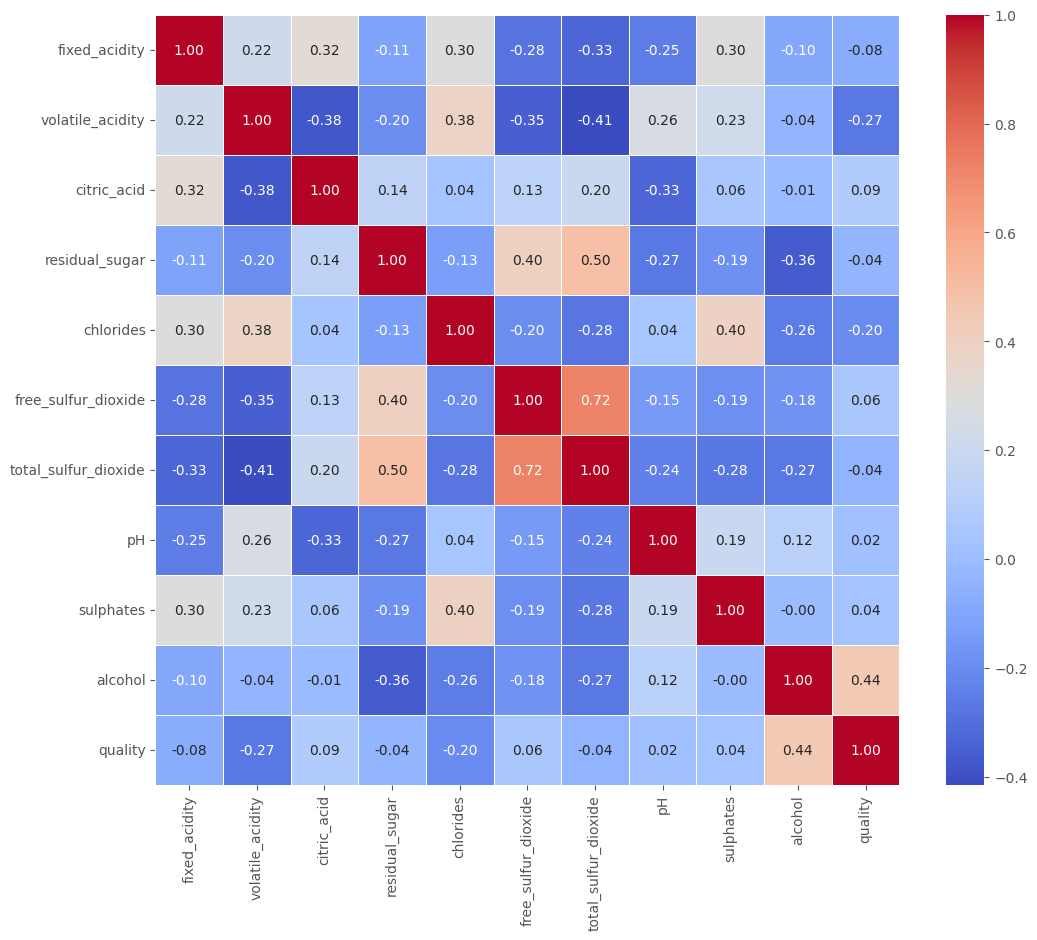

In [49]:
combined_2 = pd.concat([wq_X_2, wq_y], axis = 1)
corr_matrix_2 = combined_2.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_2, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)

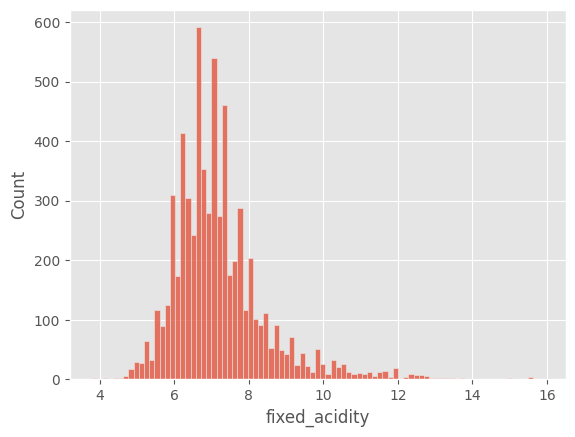

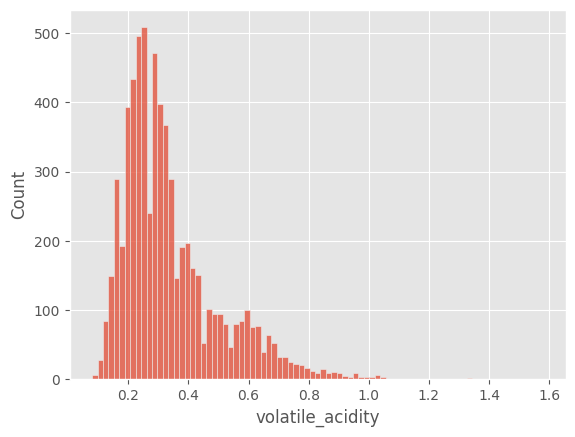

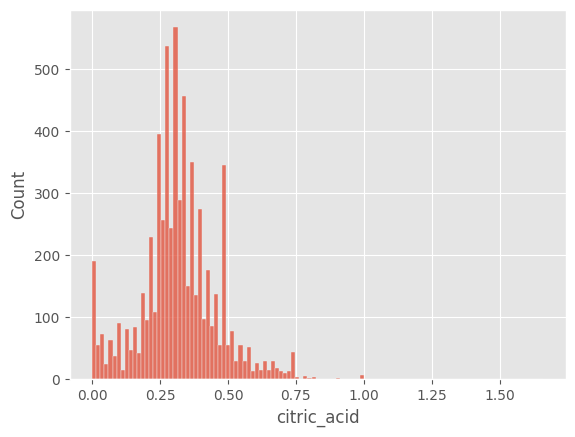

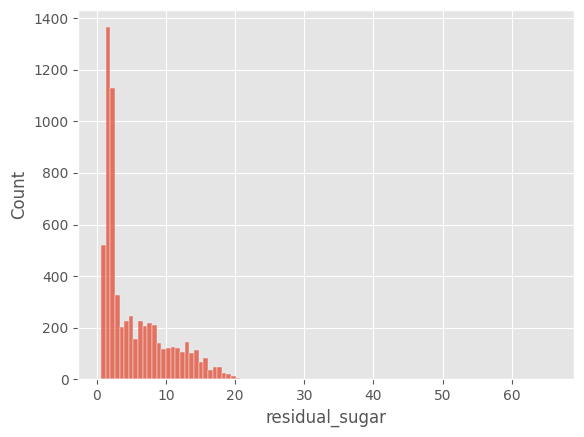

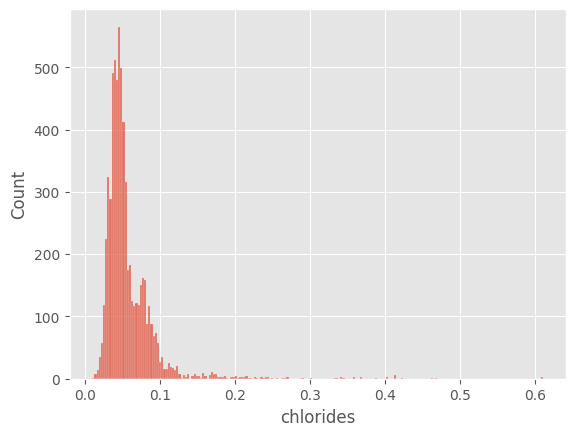

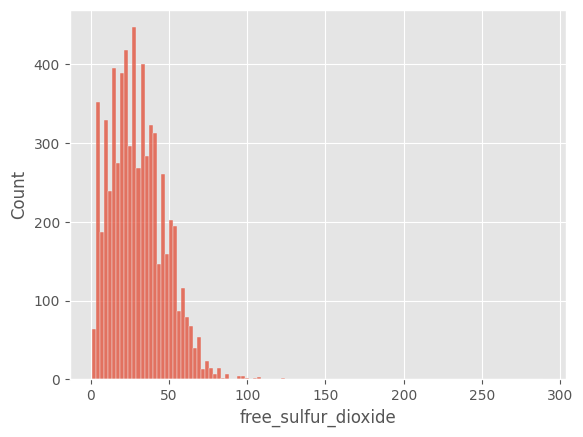

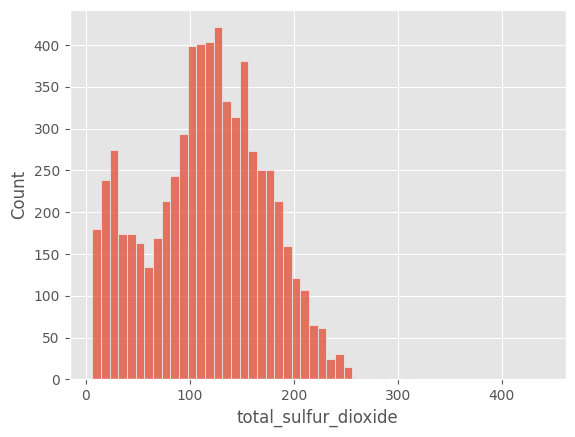

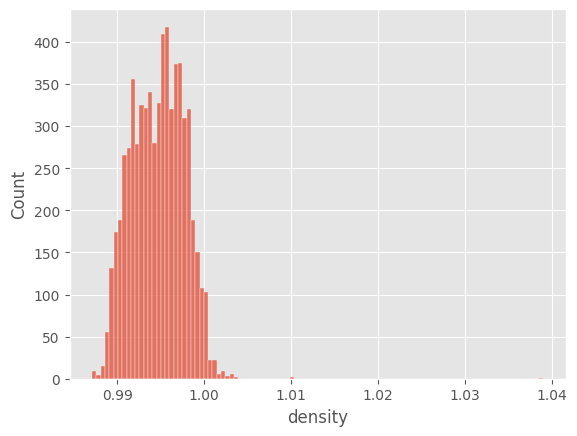

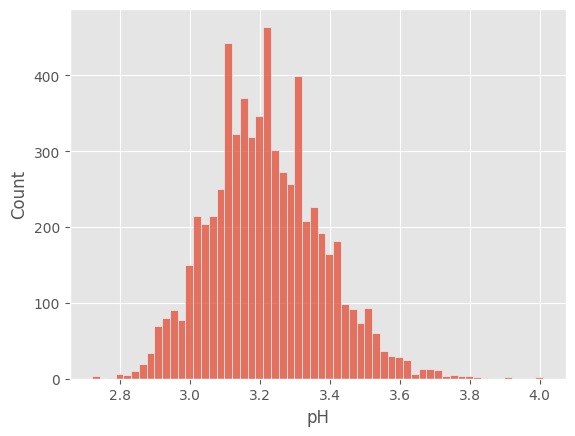

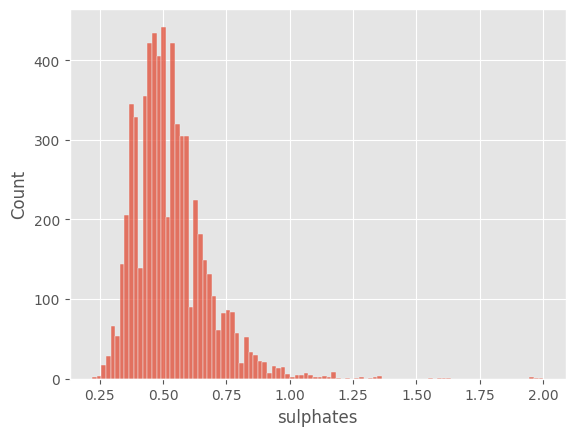

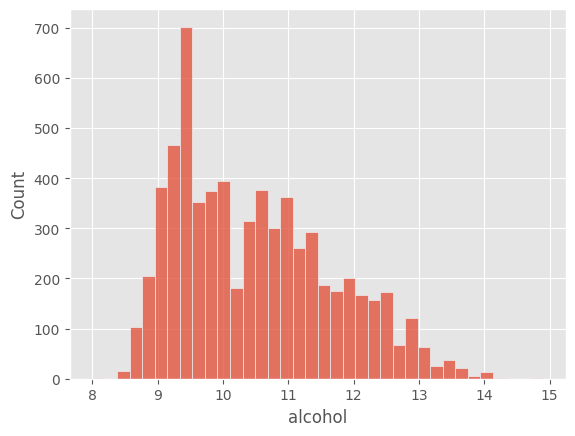

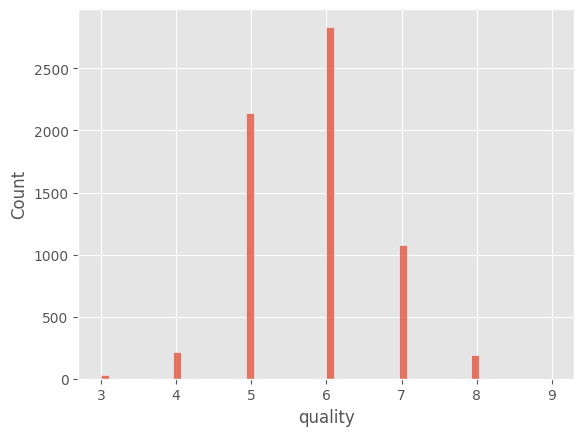

In [11]:
for column in combined.columns:
    plt.figure()
    sns.histplot(combined[column])  


In [29]:
X = combined.drop(columns = ["quality"])
y = combined["quality"]

In [42]:
X_1 = combined_1.drop(columns = ["quality"])
y_1 = combined_1["quality"]

In [50]:
X_2 = combined_2.drop(columns = ["quality"])
y_2 = combined_2["quality"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)

In [51]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42)

In [33]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5197, 11)
X_test shape: (1300, 11)
y_train shape: (5197,)
y_test shape: (1300,)


Creating two random forest models for the three datasets - the original dataset, the second one with the high variance column removed, and the third one with the high entropy feature removed

In [34]:
rf_model_1 = RandomForestClassifier()
rf_model_1.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
rf_model_2 = RandomForestClassifier()
rf_model_2.fit(X_train_1, y_train_1)

RandomForestClassifier()

In [52]:
rf_model_3 = RandomForestClassifier()
rf_model_3.fit(X_train_2, y_train_2)

RandomForestClassifier()

In [36]:
y_pred = rf_model_1.predict(X_test)

In [45]:
y_pred_1 = rf_model_2.predict(X_test_1)

In [53]:
y_pred_2 = rf_model_3.predict(X_test_2)

Printing the classification report of the first random forest model

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.88      0.16      0.27        43
           5       0.67      0.73      0.70       402
           6       0.67      0.75      0.70       597
           7       0.70      0.55      0.62       215
           8       0.93      0.36      0.52        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.55      0.36      0.40      1300
weighted avg       0.68      0.67      0.66      1300



c:\Users\Predator\Desktop\AI_semII\semII_study\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Predator\Desktop\AI_semII\semII_study\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Predator\Desktop\AI_semII\semII_study\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Printing the classification report of the second random forest model

In [46]:
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.88      0.16      0.27        43
           5       0.64      0.74      0.69       402
           6       0.67      0.73      0.70       597
           7       0.73      0.55      0.63       215
           8       0.87      0.36      0.51        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.54      0.36      0.40      1300
weighted avg       0.68      0.67      0.66      1300



c:\Users\Predator\Desktop\AI_semII\semII_study\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Predator\Desktop\AI_semII\semII_study\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Predator\Desktop\AI_semII\semII_study\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Creating the classification report of the third random forest model

In [54]:
print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.83      0.12      0.20        43
           5       0.67      0.75      0.71       402
           6       0.67      0.74      0.71       597
           7       0.70      0.54      0.61       215
           8       0.80      0.33      0.47        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.52      0.35      0.39      1300
weighted avg       0.68      0.68      0.66      1300



c:\Users\Predator\Desktop\AI_semII\semII_study\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Predator\Desktop\AI_semII\semII_study\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Predator\Desktop\AI_semII\semII_study\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [55]:
print("The accuracy of the first model is ", accuracy_score(y_test, y_pred))
print("The accuracy of the second model is ", accuracy_score(y_test_1, y_pred_1))
print("The accuracy of the third model is ", accuracy_score(y_test_2, y_pred_2))

The accuracy of the first model is  0.6746153846153846
The accuracy of the second model is  0.6692307692307692
The accuracy of the third model is  0.6753846153846154
